## Murt Sayeed

**TODO**

## HW04 Code


You will complete the following notebook, as described in the PDF for Homework 04 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/spring2021/comp135).

#### Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [2]:
# Load data
x_tr_N2 = np.loadtxt('data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

### Problem 1: MLP size [2] with activation ReLU and L-BFGS solver

In [3]:
# run 0
n_runs = 16
start_time_sec = time.time()
mlp_lbfgs = MLPClassifierLBFGS(
    hidden_layer_sizes=[2],
    activation='relu',
    alpha=0.0001,
    max_iter=200, tol=1e-6,
    random_state=0,
    )
with warnings.catch_warnings(record=True) as warn_list:
    mlp_lbfgs.fit(x_tr_N2, y_tr_N)
elapsed_time_sec = time.time() - start_time_sec
print('finished LBFGS run (relu) %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
    1, n_runs, elapsed_time_sec,
    len(mlp_lbfgs.loss_curve_),
    'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
    mlp_lbfgs.loss_))

# TODO edit this block to run from 16 different random_states
 
def run_mlp_lbfgs_relu_classifier(i):
    n_runs = 16
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
            hidden_layer_sizes=[2],
            activation='relu',
            alpha=0.0001,
            max_iter=200, tol=1e-6,
            random_state=i,
            )
    with warnings.catch_warnings(record=True) as warn_list:
            mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    
    print('finished LBFGS run (relu) %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
            i+1, n_runs, elapsed_time_sec,
            len(mlp_lbfgs.loss_curve_),
            'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
            mlp_lbfgs.loss_))
    
    return mlp_lbfgs

# Save each run's trained classifier object in a list
mlp_lbfgs_relu_1 = run_mlp_lbfgs_relu_classifier(1)
mlp_lbfgs_relu_2 = run_mlp_lbfgs_relu_classifier(2)
mlp_lbfgs_relu_3 = run_mlp_lbfgs_relu_classifier(3)
mlp_lbfgs_relu_4 = run_mlp_lbfgs_relu_classifier(4)
mlp_lbfgs_relu_5 = run_mlp_lbfgs_relu_classifier(5)
mlp_lbfgs_relu_6 = run_mlp_lbfgs_relu_classifier(6)
mlp_lbfgs_relu_7 = run_mlp_lbfgs_relu_classifier(7)
mlp_lbfgs_relu_8 = run_mlp_lbfgs_relu_classifier(8)
mlp_lbfgs_relu_9 = run_mlp_lbfgs_relu_classifier(9)
mlp_lbfgs_relu_10 = run_mlp_lbfgs_relu_classifier(10)
mlp_lbfgs_relu_11 = run_mlp_lbfgs_relu_classifier(11)
mlp_lbfgs_relu_12 = run_mlp_lbfgs_relu_classifier(12)
mlp_lbfgs_relu_13 = run_mlp_lbfgs_relu_classifier(13)
mlp_lbfgs_relu_14 = run_mlp_lbfgs_relu_classifier(14)
mlp_lbfgs_relu_15 = run_mlp_lbfgs_relu_classifier(15)

finished LBFGS run (relu)  1/16 after    0.1 sec |  29 iters | converged    | loss 0.347
finished LBFGS run (relu)  2/16 after    0.0 sec |  30 iters | converged    | loss 0.477
finished LBFGS run (relu)  3/16 after    0.0 sec |  21 iters | converged    | loss 0.347
finished LBFGS run (relu)  4/16 after    0.1 sec |  35 iters | converged    | loss 0.347
finished LBFGS run (relu)  5/16 after    0.0 sec |  29 iters | converged    | loss 0.347
finished LBFGS run (relu)  6/16 after    0.0 sec |  29 iters | converged    | loss 0.000
finished LBFGS run (relu)  7/16 after    0.0 sec |  23 iters | converged    | loss 0.000
finished LBFGS run (relu)  8/16 after    0.0 sec |  37 iters | converged    | loss 0.347
finished LBFGS run (relu)  9/16 after    0.0 sec |  15 iters | converged    | loss 0.347
finished LBFGS run (relu) 10/16 after    0.0 sec |  26 iters | converged    | loss 0.000
finished LBFGS run (relu) 11/16 after    0.0 sec |  36 iters | converged    | loss 0.347
finished LBFGS run (r

#### 1 (a): Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

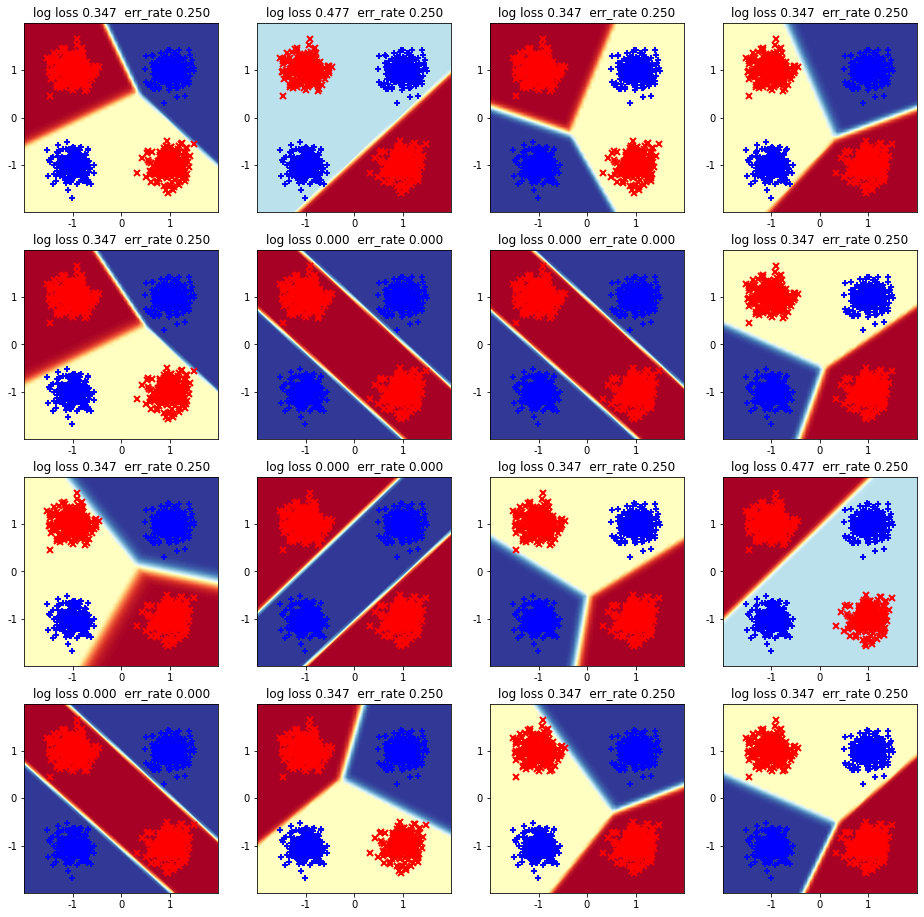

In [4]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

plot_pretty_probabilities_for_clf(mlp_lbfgs, x_tr_N2, y_tr_N, ax=ax_grid[0,0])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_1, x_tr_N2, y_tr_N, ax=ax_grid[0,1])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_2, x_tr_N2, y_tr_N, ax=ax_grid[0,2])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_3, x_tr_N2, y_tr_N, ax=ax_grid[0,3])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_4, x_tr_N2, y_tr_N, ax=ax_grid[1,0])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_5, x_tr_N2, y_tr_N, ax=ax_grid[1,1])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_6, x_tr_N2, y_tr_N, ax=ax_grid[1,2])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_7, x_tr_N2, y_tr_N, ax=ax_grid[1,3])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_8, x_tr_N2, y_tr_N, ax=ax_grid[2,0])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_9, x_tr_N2, y_tr_N, ax=ax_grid[2,1])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_10, x_tr_N2, y_tr_N, ax=ax_grid[2,2])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_11, x_tr_N2, y_tr_N, ax=ax_grid[2,3])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_12, x_tr_N2, y_tr_N, ax=ax_grid[3,0])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_13, x_tr_N2, y_tr_N, ax=ax_grid[3,1])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_14, x_tr_N2, y_tr_N, ax=ax_grid[3,2])
plot_pretty_probabilities_for_clf(mlp_lbfgs_relu_15, x_tr_N2, y_tr_N, ax=ax_grid[3,3])

#### 1 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: It seems to be that we have 4 predictions that have zero training error, which gives us 25% of run having predict the correct results. The rest 75% have log-loss of range 0.3 to 0.5 with error of 0.25 that contain miss-classification of features 1,2. In the 4 correct predictions, the model did a good job on converge to a point where the error rate was zero that shows the dedication of running multiple times while training MLP. The above model converged at 15 to 40 iterations on 0.1 to 0.2 seconds. I believe there is no connection betweem the time and iteration rate when predicting error. The ReLU and L-BFGS has rapidly converged while the longgest iteration was 39 iterations with only few seconds of run, which is really fast. The MLP Classifier model with L-BFGS solver may have updated the weights in the network where minimum error was not possible and 75% of of 16 runs had an error rate of 0.25.

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver


In [5]:
# TODO edit this block to run 16 different random_state models with LOGISTIC activation
def run_mlp_lbfgs_sig_classifier(i):
    n_runs = 16
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    
    print('finished LBFGS (sigmoid) run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
    
    return mlp_lbfgs

# Save each run's trained classifier object in a list
mlp_lbfgs_sig_0 = run_mlp_lbfgs_sig_classifier(0)
mlp_lbfgs_sig_1 = run_mlp_lbfgs_sig_classifier(1)
mlp_lbfgs_sig_2 = run_mlp_lbfgs_sig_classifier(2)
mlp_lbfgs_sig_3 = run_mlp_lbfgs_sig_classifier(3)
mlp_lbfgs_sig_4 = run_mlp_lbfgs_sig_classifier(4)
mlp_lbfgs_sig_5 = run_mlp_lbfgs_sig_classifier(5)
mlp_lbfgs_sig_6 = run_mlp_lbfgs_sig_classifier(6)
mlp_lbfgs_sig_7 = run_mlp_lbfgs_sig_classifier(7)
mlp_lbfgs_sig_8 = run_mlp_lbfgs_sig_classifier(8)
mlp_lbfgs_sig_9 = run_mlp_lbfgs_sig_classifier(9)
mlp_lbfgs_sig_10 = run_mlp_lbfgs_sig_classifier(10)
mlp_lbfgs_sig_11 = run_mlp_lbfgs_sig_classifier(11)
mlp_lbfgs_sig_12 = run_mlp_lbfgs_sig_classifier(12)
mlp_lbfgs_sig_13 = run_mlp_lbfgs_sig_classifier(13)
mlp_lbfgs_sig_14 = run_mlp_lbfgs_sig_classifier(14)
mlp_lbfgs_sig_15 = run_mlp_lbfgs_sig_classifier(15)

finished LBFGS (sigmoid) run  1/16 after    0.1 sec |  56 iters | converged    | loss 0.000
finished LBFGS (sigmoid) run  2/16 after    0.1 sec | 121 iters | converged    | loss 0.347
finished LBFGS (sigmoid) run  3/16 after    0.0 sec |  45 iters | converged    | loss 0.347
finished LBFGS (sigmoid) run  4/16 after    0.1 sec |  74 iters | converged    | loss 0.000
finished LBFGS (sigmoid) run  5/16 after    0.0 sec |  40 iters | converged    | loss 0.477
finished LBFGS (sigmoid) run  6/16 after    0.0 sec |  42 iters | converged    | loss 0.000
finished LBFGS (sigmoid) run  7/16 after    0.0 sec |  50 iters | converged    | loss 0.000
finished LBFGS (sigmoid) run  8/16 after    0.0 sec |  42 iters | converged    | loss 0.477
finished LBFGS (sigmoid) run  9/16 after    0.0 sec |  61 iters | converged    | loss 0.347
finished LBFGS (sigmoid) run 10/16 after    0.1 sec | 136 iters | converged    | loss 0.347
finished LBFGS (sigmoid) run 11/16 after    0.1 sec | 105 iters | converged    |

#### 2 (a): Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

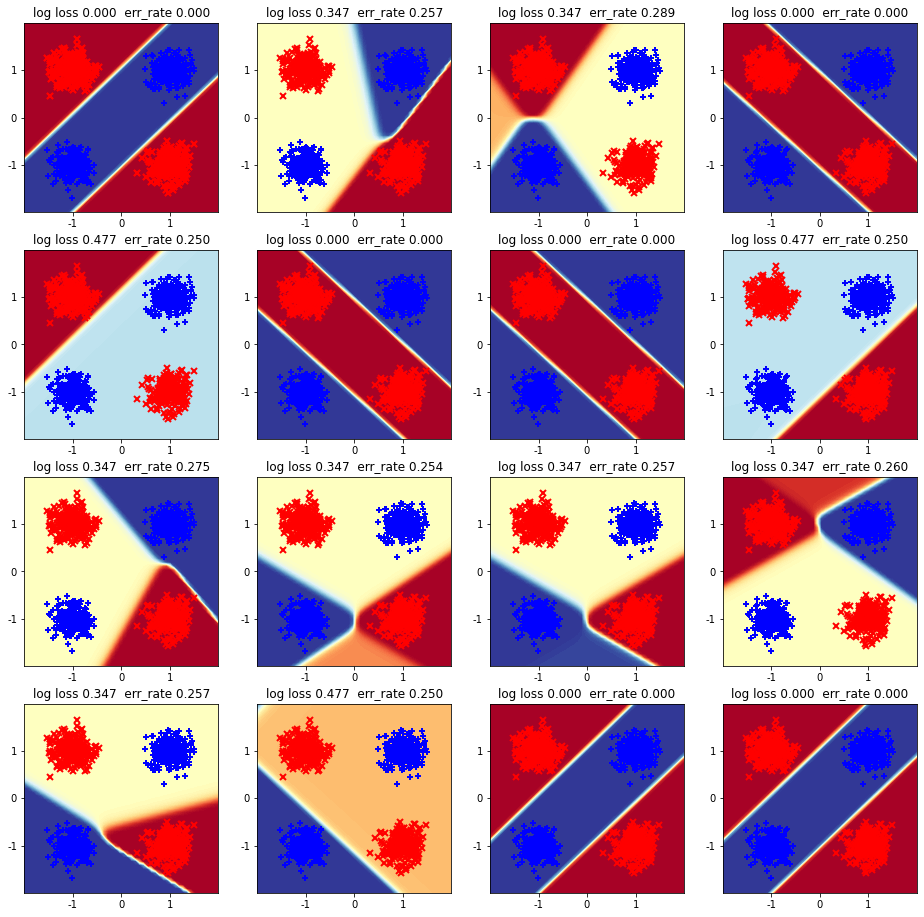

In [6]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_lbfgs, x_tr_N2, y_tr_N, ax=ax_grid[0,0])

plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_0, x_tr_N2, y_tr_N, ax=ax_grid[0,0])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_1, x_tr_N2, y_tr_N, ax=ax_grid[0,1])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_2, x_tr_N2, y_tr_N, ax=ax_grid[0,2])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_3, x_tr_N2, y_tr_N, ax=ax_grid[0,3])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_4, x_tr_N2, y_tr_N, ax=ax_grid[1,0])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_5, x_tr_N2, y_tr_N, ax=ax_grid[1,1])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_6, x_tr_N2, y_tr_N, ax=ax_grid[1,2])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_7, x_tr_N2, y_tr_N, ax=ax_grid[1,3])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_8, x_tr_N2, y_tr_N, ax=ax_grid[2,0])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_9, x_tr_N2, y_tr_N, ax=ax_grid[2,1])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_10, x_tr_N2, y_tr_N, ax=ax_grid[2,2])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_11, x_tr_N2, y_tr_N, ax=ax_grid[2,3])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_12, x_tr_N2, y_tr_N, ax=ax_grid[3,0])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_13, x_tr_N2, y_tr_N, ax=ax_grid[3,1])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_14, x_tr_N2, y_tr_N, ax=ax_grid[3,2])
plot_pretty_probabilities_for_clf(mlp_lbfgs_sig_15, x_tr_N2, y_tr_N, ax=ax_grid[3,3])

#### 2 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: This time, 6 runs (37.5%) had zero training error out of all 16, which is higher than last section of ReLU activation. The other runs had error range of 0.25 to 0.289 with log-loss range of 0.347 to 0.478. From timing perspective, these models were faster with 0.1 to 0.2 seconds all iterations compare to last MLP classifier on ReLU activation, as iterations range this time was is 33 to 136 with avg round in 60s. This is definitely slower than last ReLU models. One can make sense of this since Logistic activation function have more diversity class compare to a simple linear activitaion of ReLU. 

### Problem 3: MLP size [2] with activation ReLU and SGD solver

In [7]:
#run 0
n_runs = 16
start_time_sec = time.time()
mlp_sgd = MLPClassifier(
    hidden_layer_sizes=[2],
    activation='relu',
    alpha=0.0001,
    max_iter=400, tol=1e-8,
    random_state=0,
    solver='sgd', batch_size=10,
    learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
    )
with warnings.catch_warnings(record=True) as warn_list:
    mlp_sgd.fit(x_tr_N2, y_tr_N)
mlp_sgd.did_converge = True if len(warn_list) == 0 else False
elapsed_time_sec = time.time() - start_time_sec

print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
    1, n_runs, elapsed_time_sec,
    len(mlp_sgd.loss_curve_),
        'converged    ' if mlp_sgd.did_converge else 'NOT converged',
        mlp_sgd.loss_))


# TODO edit this block to do 16 different runs (each with different random_state value)
def run_mlp_sgd_relu_classifier(i):
    n_runs = 16
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
    
    return mlp_sgd


# Save each run's trained classifier object in a list 
mlp_sgd_relu_1 = run_mlp_sgd_relu_classifier(1)
mlp_sgd_relu_2 = run_mlp_sgd_relu_classifier(2)
mlp_sgd_relu_3 = run_mlp_sgd_relu_classifier(3)
mlp_sgd_relu_4 = run_mlp_sgd_relu_classifier(4)
mlp_sgd_relu_5 = run_mlp_sgd_relu_classifier(5)
mlp_sgd_relu_6 = run_mlp_sgd_relu_classifier(6)
mlp_sgd_relu_7 = run_mlp_sgd_relu_classifier(7)
mlp_sgd_relu_8 = run_mlp_sgd_relu_classifier(8)
mlp_sgd_relu_9 = run_mlp_sgd_relu_classifier(9)
mlp_sgd_relu_10 = run_mlp_sgd_relu_classifier(10)
mlp_sgd_relu_11 = run_mlp_sgd_relu_classifier(11)
mlp_sgd_relu_12 = run_mlp_sgd_relu_classifier(12)
mlp_sgd_relu_13 = run_mlp_sgd_relu_classifier(13)
mlp_sgd_relu_14 = run_mlp_sgd_relu_classifier(14)
mlp_sgd_relu_15 = run_mlp_sgd_relu_classifier(15)

finished SGD run  1/16 after    9.3 sec | 267 epochs | converged     | loss 0.347
finished SGD run  2/16 after   11.8 sec | 307 epochs | converged     | loss 0.478
finished SGD run  3/16 after   11.0 sec | 239 epochs | converged     | loss 0.347
finished SGD run  4/16 after   21.6 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  5/16 after   13.7 sec | 275 epochs | converged     | loss 0.347
finished SGD run  6/16 after   21.5 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  7/16 after   17.1 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run  8/16 after   12.2 sec | 273 epochs | converged     | loss 0.347
finished SGD run  9/16 after    7.7 sec | 219 epochs | converged     | loss 0.347
finished SGD run 10/16 after   14.0 sec | 400 epochs | NOT converged | loss 0.001
finished SGD run 11/16 after   13.4 sec | 394 epochs | converged     | loss 0.478
finished SGD run 12/16 after   14.0 sec | 400 epochs | NOT converged | loss 0.478
finished SGD run

#### 3 (a): Visualize probabilistic predictions in 2D feature space for ReLU + SGD

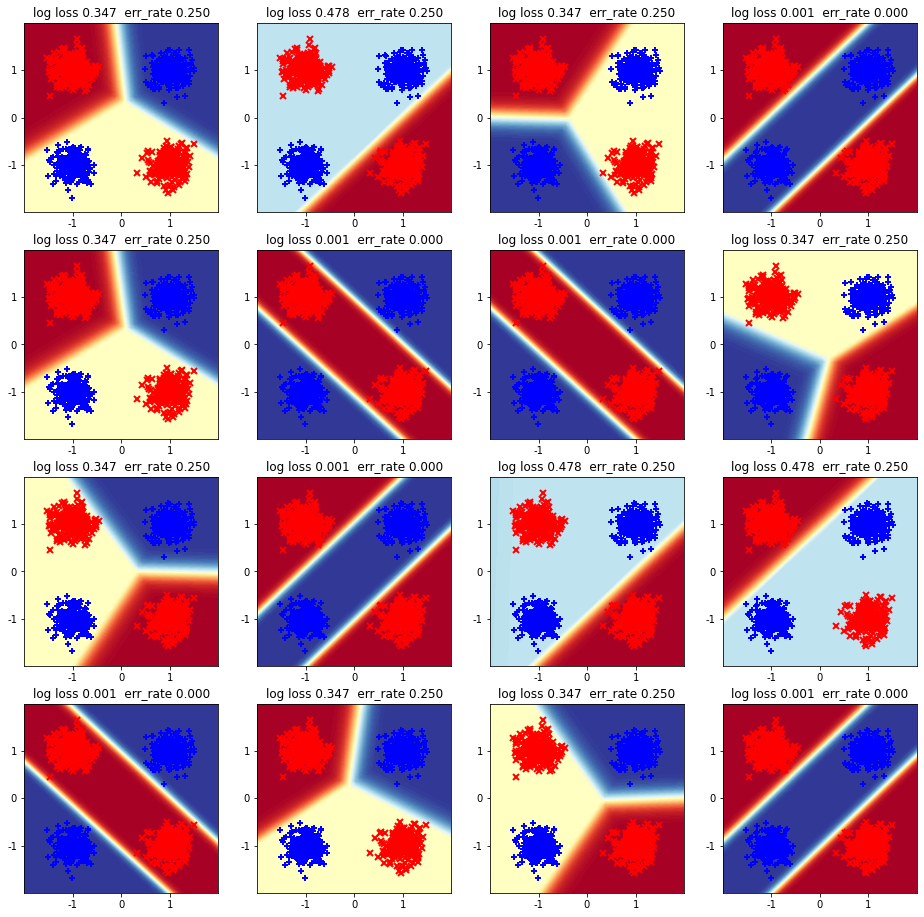

In [8]:
# TODO edit to plot all 16 runs from above

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_sgd, x_tr_N2, y_tr_N, ax=ax_grid[0,0])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_1, x_tr_N2, y_tr_N, ax=ax_grid[0,1])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_2, x_tr_N2, y_tr_N, ax=ax_grid[0,2])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_3, x_tr_N2, y_tr_N, ax=ax_grid[0,3])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_4, x_tr_N2, y_tr_N, ax=ax_grid[1,0])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_5, x_tr_N2, y_tr_N, ax=ax_grid[1,1])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_6, x_tr_N2, y_tr_N, ax=ax_grid[1,2])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_7, x_tr_N2, y_tr_N, ax=ax_grid[1,3])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_8, x_tr_N2, y_tr_N, ax=ax_grid[2,0])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_9, x_tr_N2, y_tr_N, ax=ax_grid[2,1])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_10, x_tr_N2, y_tr_N, ax=ax_grid[2,2])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_11, x_tr_N2, y_tr_N, ax=ax_grid[2,3])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_12, x_tr_N2, y_tr_N, ax=ax_grid[3,0])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_13, x_tr_N2, y_tr_N, ax=ax_grid[3,1])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_14, x_tr_N2, y_tr_N, ax=ax_grid[3,2])
plot_pretty_probabilities_for_clf(mlp_sgd_relu_15, x_tr_N2, y_tr_N, ax=ax_grid[3,3])

#### 3 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: This time around again we have 6 runs (37.5%) with zero training error, while the log-loss was 0.001 which is different than part 1 of ReLU activation. The 7 out of 16 didn't converged and out of these 7, 6 had zero error. The difference between L-BFGS and SGD is the number of iterations we can train a model while there is a possibility that model might not converge, i.e. in our case. For us, it took 200 to 300 iterations and took much longer time for the classifieries to converge or not converge. This model took longer time compare to L-BFGS while using the same ReLU activation function and lots didnt even converge. 

#### 3 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in part 1 (using the same ReLU activation function)?  Why, do you believe, these differences exist?

**Answer**: SGD has more predictions that give zero error on training data (37.5%), compared to L-BFGS in part 1 (25%). The SGD took more time and higher number of iterations that each batch was running for.  Also, the SGD batch with zero training error didnt even converge at an optimal set of weights. The main reason for this is because SGD takes first derivative and L-BFGS takes both first derivative and second derivative, thus L-BFGS is converging faster and more often than SGD, which didn't appears to converge often. Another reason is that SGD had weights on subset of training data and ran for max iteration of 400, compared to 200 iterations of L-BFGS.

### Problem 4: MLP size [2] with activation Logistic and SGD solver

In [9]:
# TODO edit to do 16 runs of SGD, like in previous step, but with LOGISTIC activation
def run_mlp_sgd_sig_classifier(i):
    n_runs = 16
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=400, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    
    print('finished SGD run (logistic) %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
    
    return mlp_sgd

# Save each run's trained classifier object in a list 
mlp_sgd_sig_0 = run_mlp_sgd_sig_classifier(0)
mlp_sgd_sig_1 = run_mlp_sgd_sig_classifier(1)
mlp_sgd_sig_2 = run_mlp_sgd_sig_classifier(2)
mlp_sgd_sig_3 = run_mlp_sgd_sig_classifier(3)
mlp_sgd_sig_4 = run_mlp_sgd_sig_classifier(4)
mlp_sgd_sig_5 = run_mlp_sgd_sig_classifier(5)
mlp_sgd_sig_6 = run_mlp_sgd_sig_classifier(6)
mlp_sgd_sig_7 = run_mlp_sgd_sig_classifier(7)
mlp_sgd_sig_8 = run_mlp_sgd_sig_classifier(8)
mlp_sgd_sig_9 = run_mlp_sgd_sig_classifier(9)
mlp_sgd_sig_10 = run_mlp_sgd_sig_classifier(10)
mlp_sgd_sig_11 = run_mlp_sgd_sig_classifier(11)
mlp_sgd_sig_12 = run_mlp_sgd_sig_classifier(12)
mlp_sgd_sig_13 = run_mlp_sgd_sig_classifier(13)
mlp_sgd_sig_14 = run_mlp_sgd_sig_classifier(14)
mlp_sgd_sig_15 = run_mlp_sgd_sig_classifier(15)

finished SGD run (logistic)  1/16 after    6.5 sec | 161 epochs | converged     | loss 0.693
finished SGD run (logistic)  2/16 after   13.7 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run (logistic)  3/16 after   13.9 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run (logistic)  4/16 after    7.2 sec | 215 epochs | converged     | loss 0.693
finished SGD run (logistic)  5/16 after   14.8 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run (logistic)  6/16 after   18.1 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run (logistic)  7/16 after   22.0 sec | 400 epochs | NOT converged | loss 0.005
finished SGD run (logistic)  8/16 after   13.0 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run (logistic)  9/16 after   13.7 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run (logistic) 10/16 after   17.2 sec | 400 epochs | NOT converged | loss 0.351
finished SGD run (logistic) 11/16 after    4.4 sec | 124 epochs | conv

#### 4(a): Visualize probabilistic predictions in 2D feature space for Logistic + SGD

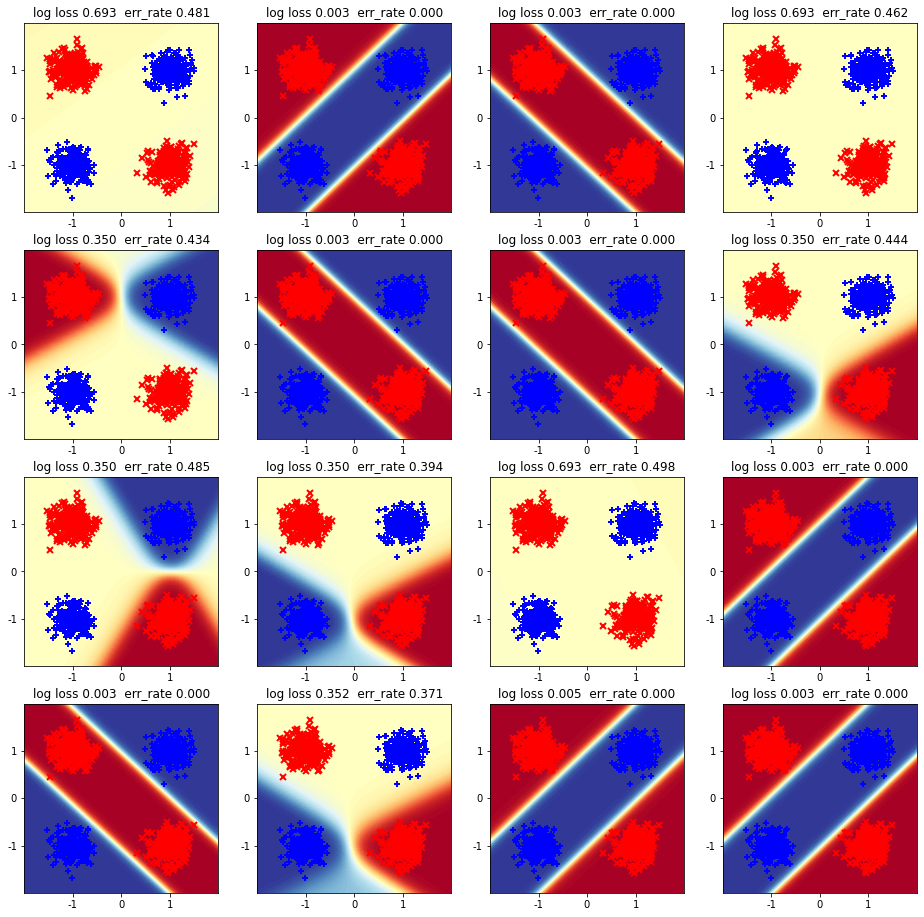

In [10]:
# TODO edit to plot all 16 runs from previous step

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
plot_pretty_probabilities_for_clf(mlp_sgd_sig_0, x_tr_N2, y_tr_N, ax=ax_grid[0,0])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_1, x_tr_N2, y_tr_N, ax=ax_grid[0,1])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_2, x_tr_N2, y_tr_N, ax=ax_grid[0,2])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_3, x_tr_N2, y_tr_N, ax=ax_grid[0,3])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_4, x_tr_N2, y_tr_N, ax=ax_grid[1,0])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_5, x_tr_N2, y_tr_N, ax=ax_grid[1,1])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_6, x_tr_N2, y_tr_N, ax=ax_grid[1,2])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_7, x_tr_N2, y_tr_N, ax=ax_grid[1,3])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_8, x_tr_N2, y_tr_N, ax=ax_grid[2,0])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_9, x_tr_N2, y_tr_N, ax=ax_grid[2,1])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_10, x_tr_N2, y_tr_N, ax=ax_grid[2,2])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_11, x_tr_N2, y_tr_N, ax=ax_grid[2,3])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_12, x_tr_N2, y_tr_N, ax=ax_grid[3,0])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_13, x_tr_N2, y_tr_N, ax=ax_grid[3,1])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_14, x_tr_N2, y_tr_N, ax=ax_grid[3,2])
plot_pretty_probabilities_for_clf(mlp_sgd_sig_15, x_tr_N2, y_tr_N, ax=ax_grid[3,3])

#### 4 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: This time, we have 50% (8 out of 16) runs with zero error and all of these didn't converge. Overall, most of runs didnt converge at our weight, while only three converged. It took same amount of time to converge as previous part 3, but still longer than part 1 and part 2. The other runs had error from 0.3 to 0.5, which isnt ideal; they didn't converged after 400 iterations and took more time than L-BFGS models since it requires more time for converge.

#### 4 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS runs in part 2 (using the same logistic activation function)?  Why, do you believe, these differences exist?

**Answer**: This model has more runs of zero training error, compared to L-BFGS with logistic sigmoid activation. But it still requires more time with no guarantee of converging. In addition, the number of iterations is larger, 400 vs. 20-30, and this requires more time. The calculation of gradient descent is the reason for a huge delta of number of iterations, where SGD takes more time to converge and calculate weights, compared to L-BFGS. Restating from part 3, SGD is using first derivative while L-BFGS uses both first and second derivatives to help converge faster.

### Problem 5: Comparing loss_curves

#### 5 (a): Plot loss_curves for each method in 2 x 2 subplot grid

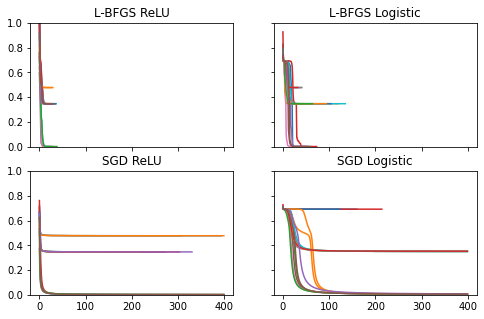

In [11]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,5))

# TODO plot 16 curves for each of the 2x2 settings of solver and activation
ax_grid[0,0].set_title('L-BFGS ReLU')
ax_grid[0,0].plot(mlp_lbfgs.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_1.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_2.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_3.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_4.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_5.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_6.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_7.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_8.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_9.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_10.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_11.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_12.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_13.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_14.loss_curve_)
ax_grid[0,0].plot(mlp_lbfgs_relu_15.loss_curve_)

ax_grid[0,1].set_title('L-BFGS Logistic')
ax_grid[0,1].plot(mlp_lbfgs_sig_0.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_1.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_2.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_3.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_4.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_5.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_6.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_7.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_8.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_9.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_10.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_11.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_12.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_13.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_14.loss_curve_) 
ax_grid[0,1].plot(mlp_lbfgs_sig_15.loss_curve_) 

ax_grid[1,0].set_title('SGD ReLU')
ax_grid[1,0].plot(mlp_sgd.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_1.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_2.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_3.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_4.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_5.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_6.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_7.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_8.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_9.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_10.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_11.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_12.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_13.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_14.loss_curve_) 
ax_grid[1,0].plot(mlp_sgd_relu_15.loss_curve_)

ax_grid[1,1].set_title('SGD Logistic')
ax_grid[1,1].plot(mlp_sgd_sig_0.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_1.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_2.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_3.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_4.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_5.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_6.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_7.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_8.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_9.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_10.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_11.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_12.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_13.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_14.loss_curve_) 
ax_grid[1,1].plot(mlp_sgd_sig_15.loss_curve_)

plt.ylim([0, 1.0]); # keep this y limit so it's easy to compare across plots

#### 5 (b): From this overview plot (plus your detailed plots from prior steps), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?  Which requires most iterations in general?

**Answer:** I believe, ReLU is easier to optimize by looking at the far left graphs where loss curves drop signficantly faster than logistics and ReLU also has lesser curves within them, resulting ReLU less complex. The many plots we had in other parts, tell us that ReLU also converges within shorter amount of iterations. The SGD-logistics has the worest track record of converging, compare to all other three. Therefore, we can conclude that ReLU is easilier to work on and optimize within small number of iterations. The logistic activation functions is taking higher number of iterations and hard to optimize based on number of loss curves.

#### 5 (c): Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**: There is no 100% guarantee that ReLU is easier to optimize. But i will choose below additional experiments to test this further so we can be sure which activiation function is better to optimize.

1) The 16 runs that we worked on are too low of a number. We should test with at least few hundreds runs.

2) It would be better to have larger set of data for training and with many features, compared to our above dataset of 1000 points.

3) We should either use other activation functions (Softmax) and/or use other algorithems (mini batch or accelerated gradient descent) outside of L-BFGS or SGD.